In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
input_data = pd.read_csv("deepsolar_tract.csv", encoding="latin-1")

In [3]:
input_data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# used to drop any rows that contain any null values from the list of demographic factors I intend to take a deeper look at
input_data[['tile_count', 'average_household_income', 'race_asian','race_black_africa','race_indian_alaska','race_white']].dropna()

,tile_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white
0,0.0,70352.789869,28,19,16,6420
1,25.0,61727.085202,188,205,23,7405
2,3.0,71496.886583,0,0,2,6939
3,0.0,86840.152755,171,69,26,5693
4,5.0,89135.315597,34,91,0,5017
...,...,...,...,...,...,...
72532,1.0,90163.611860,210,36,0,6078
72533,0.0,45124.153006,7,90,175,2384
72534,1.0,60878.458738,54,93,380,4064
72535,0.0,56817.996870,10,0,115,1669


### get the top five states in terms of solar panel growth which are California, Florida, Arizona, New Jersey, and Massachusetts

In [36]:
top_five = input_data[['state', 'tile_count']].groupby('state', as_index=False).sum()
top_five.nlargest(5, ['tile_count'])

,state,tile_count
3,ca,987594.0
8,fl,179782.0
2,az,156941.0
29,nj,131960.0
17,ma,92675.0


In [65]:
ca_df = input_data[input_data['state']=='ca'][['state','county','tile_count','average_household_income', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()
fl_df = input_data[input_data['state']=='fl'][['county','tile_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()
az_df = input_data[input_data['state']=='az'][['county','tile_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()
nj_df = input_data[input_data['state']=='nj'][['county','tile_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()
ma_df = input_data[input_data['state']=='ma'][['county','tile_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()

### correlation between solar panel tile count and demographic factors such as average household income and racial ethnicity across top five states in solar panel growth

In [50]:
ca_df.append(fl_df).append(az_df).append(az_df).append(nj_df).append(ma_df).corr()

,tile_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white
tile_count,1.000000,0.289908,0.382169,-0.229655,-0.149532,0.284830
average_household_income,0.289908,1.000000,0.601199,-0.141740,-0.238562,0.027299
race_asian,0.382169,0.601199,1.000000,-0.032229,-0.131614,-0.132048
race_black_africa,-0.229655,-0.141740,-0.032229,1.000000,-0.204925,0.000506
race_indian_alaska,-0.149532,-0.238562,-0.131614,-0.204925,1.000000,-0.349543
race_white,0.284830,0.027299,-0.132048,0.000506,-0.349543,1.000000


In [51]:
ca_df["color"] = "dodgerblue"
fl_df["color"] = "orange"
az_df["color"] = "red"
nj_df["color"] = "forestgreen"
ma_df["color"] = "blueviolet"

In [54]:
# these numbers represent the average of each of the state's counties
top_five_states = ca_df.append(fl_df).append(az_df).append(az_df).append(nj_df).append(ma_df)
top_five_states

,state,county,tile_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white,color
0,ca,Alameda County,106.155125,101764.701704,1216.218837,512.141274,27.182825,1962.764543,dodgerblue
1,ca,Alpine County,0.000000,62958.659218,14.000000,11.000000,219.000000,783.000000,dodgerblue
2,ca,Amador County,42.333333,72258.148307,59.777778,95.000000,92.111111,3556.222222,dodgerblue
3,ca,Butte County,89.823529,59340.222385,188.058824,62.529412,50.058824,3635.450980,dodgerblue
4,ca,Calaveras County,46.000000,75444.816219,40.200000,26.100000,39.600000,4121.000000,dodgerblue
...,...,...,...,...,...,...,...,...,...
9,ma,Nantucket County,2.500000,118786.560424,20.000000,165.833333,0.833333,1507.833333,blueviolet
10,ma,Norfolk County,73.400000,121970.240265,512.938462,331.300000,4.338462,4270.000000,blueviolet
11,ma,Plymouth County,89.584158,95851.579720,63.396040,449.811881,6.960396,4231.613861,blueviolet
12,ma,Suffolk County,17.455882,81180.745978,320.568627,833.068627,12.710784,2066.122549,blueviolet


## kmeans clustering on top 5 states (CA, AZ, FL, NJ, MA) of solar panel growth (average household income vs tile count)

### preprocessing

In [105]:
label_encoder = preprocessing.LabelEncoder()

In [106]:
top_five_states['state'] = label_encoder.fit_transform(top_five_states['state'])

In [107]:
top_five_states

,state,county,tile_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white,color
0,1,Alameda County,106.155125,101764.701704,1216.218837,512.141274,27.182825,1962.764543,dodgerblue
1,1,Alpine County,0.000000,62958.659218,14.000000,11.000000,219.000000,783.000000,dodgerblue
2,1,Amador County,42.333333,72258.148307,59.777778,95.000000,92.111111,3556.222222,dodgerblue
3,1,Butte County,89.823529,59340.222385,188.058824,62.529412,50.058824,3635.450980,dodgerblue
4,1,Calaveras County,46.000000,75444.816219,40.200000,26.100000,39.600000,4121.000000,dodgerblue
...,...,...,...,...,...,...,...,...,...
9,3,Nantucket County,2.500000,118786.560424,20.000000,165.833333,0.833333,1507.833333,blueviolet
10,3,Norfolk County,73.400000,121970.240265,512.938462,331.300000,4.338462,4270.000000,blueviolet
11,3,Plymouth County,89.584158,95851.579720,63.396040,449.811881,6.960396,4231.613861,blueviolet
12,3,Suffolk County,17.455882,81180.745978,320.568627,833.068627,12.710784,2066.122549,blueviolet


In [108]:
X = top_five_states[['tile_count','average_household_income']]

In [109]:
X = X.to_numpy()
X

array([[1.06155125e+02, 1.01764702e+05],
       [0.00000000e+00, 6.29586592e+04],
       [4.23333333e+01, 7.22581483e+04],
       [8.98235294e+01, 5.93402224e+04],
       [4.60000000e+01, 7.54448162e+04],
       [9.26000000e+01, 6.42253665e+04],
       [2.45014423e+02, 1.08654144e+05],
       [3.50000000e+00, 5.23363356e+04],
       [1.43372093e+02, 9.13372596e+04],
       [2.12115578e+02, 6.25318816e+04],
       [1.51833333e+02, 6.35026309e+04],
       [3.02258065e+01, 5.63239930e+04],
       [2.11258065e+02, 5.55888699e+04],
       [2.41666667e+01, 6.67741439e+04],
       [2.62397351e+02, 6.40004806e+04],
       [3.09148148e+02, 6.19008663e+04],
       [5.85333333e+01, 4.78801966e+04],
       [1.55555556e+00, 6.11366815e+04],
       [6.10963342e+01, 7.95241975e+04],
       [1.80869565e+02, 5.94309470e+04],
       [1.04946429e+02, 1.47071451e+05],
       [3.50000000e+00, 6.72175495e+04],
       [2.28571429e+01, 6.03559255e+04],
       [1.62816327e+02, 5.72499223e+04],
       [4.250000

In [110]:
actual_labels = np.array(top_five_states['state'])
actual_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [111]:
kmeans = KMeans(n_clusters=5, random_state=21)

In [112]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [113]:
centers = kmeans.cluster_centers_
print(centers)

[[8.03325910e+01 7.85308401e+04]
 [3.20780313e+01 5.04651913e+04]
 [7.33208791e+01 1.27000907e+05]
 [1.00512268e+02 9.70430136e+04]
 [7.32373696e+01 6.32638894e+04]]


In [114]:
new_labels = kmeans.labels_
new_labels

array([3, 4, 0, 4, 0, 4, 3, 1, 3, 4, 4, 1, 1, 4, 4, 4, 1, 4, 0, 4, 2, 4,
       4, 4, 1, 4, 0, 3, 0, 3, 3, 4, 0, 0, 0, 4, 0, 2, 4, 0, 2, 3, 2, 3,
       4, 4, 1, 0, 0, 4, 4, 1, 1, 1, 4, 3, 0, 1, 4, 4, 4, 1, 4, 0, 1, 4,
       1, 4, 3, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 0,
       1, 1, 4, 4, 4, 4, 1, 1, 1, 4, 1, 0, 4, 3, 0, 0, 1, 4, 4, 0, 4, 4,
       1, 1, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 4, 1,
       0, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 0, 1, 1, 4, 4, 1, 4,
       1, 0, 2, 3, 0, 0, 4, 0, 3, 0, 2, 3, 3, 2, 2, 0, 0, 0, 2, 3, 3, 0,
       0, 0, 0, 3, 3, 4, 4, 0, 2, 2, 2, 3, 0, 0], dtype=int32)

Text(0, 0.5, 'Average Tile count')

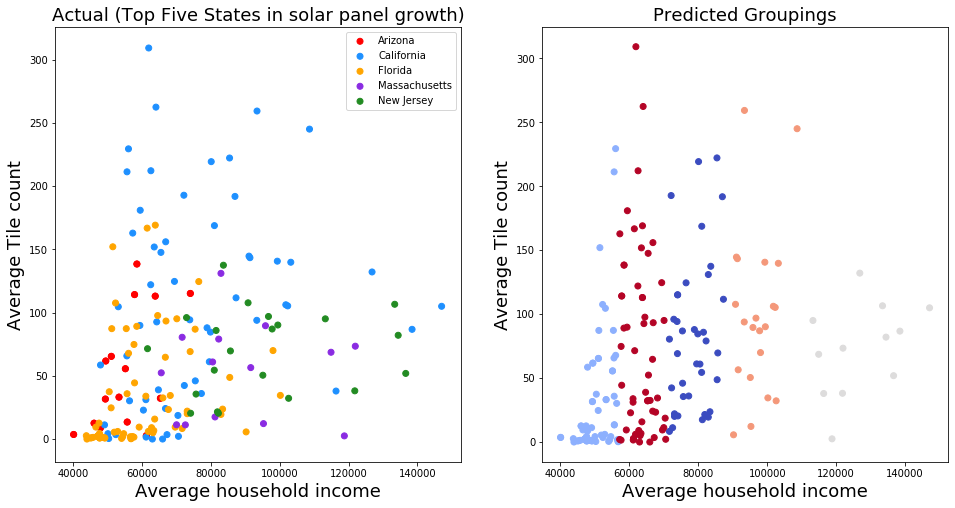

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
for (i, cls) in enumerate(set(actual_labels)):
    x = [p for (j,p) in enumerate(X[:,1]) if actual_labels[j]==cls]
    y = [p for (j,p) in enumerate(X[:,0]) if actual_labels[j]==cls]
    color = [c for (j,c) in enumerate(top_five_states['color']) if actual_labels[j]==cls]
    if (cls == 0):
        label = "Arizona"
    elif (cls == 1):
        label = "California"
    elif (cls == 2):
        label = "Florida"
    elif (cls == 3):
        label = "Massachusetts"
    elif (cls == 4):
        label = "New Jersey"
    axes[0].scatter(x, y, c=color, label=label)
    axes[0].set_title("Actual (Top Five States in solar panel growth)", fontsize=18)
    axes[0].set_xlabel("Average household income", fontsize=18)
    axes[0].set_ylabel("Average Tile count", fontsize=18)
axes[0].legend()
axes[1].scatter(X[:,1], X[:,0], c=new_labels, cmap="coolwarm")
axes[1].set_title("Predicted Groupings", fontsize=18)
axes[1].set_xlabel("Average household income", fontsize=18)
axes[1].set_ylabel("Average Tile count", fontsize=18)

## k-means on top 5 states of solar panel growth (race vs tile count)

In [116]:
top_five_states

,state,county,tile_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white,color
0,1,Alameda County,106.155125,101764.701704,1216.218837,512.141274,27.182825,1962.764543,dodgerblue
1,1,Alpine County,0.000000,62958.659218,14.000000,11.000000,219.000000,783.000000,dodgerblue
2,1,Amador County,42.333333,72258.148307,59.777778,95.000000,92.111111,3556.222222,dodgerblue
3,1,Butte County,89.823529,59340.222385,188.058824,62.529412,50.058824,3635.450980,dodgerblue
4,1,Calaveras County,46.000000,75444.816219,40.200000,26.100000,39.600000,4121.000000,dodgerblue
...,...,...,...,...,...,...,...,...,...
9,3,Nantucket County,2.500000,118786.560424,20.000000,165.833333,0.833333,1507.833333,blueviolet
10,3,Norfolk County,73.400000,121970.240265,512.938462,331.300000,4.338462,4270.000000,blueviolet
11,3,Plymouth County,89.584158,95851.579720,63.396040,449.811881,6.960396,4231.613861,blueviolet
12,3,Suffolk County,17.455882,81180.745978,320.568627,833.068627,12.710784,2066.122549,blueviolet


In [117]:
# first kmeans on white population
X = top_five_states[['tile_count','race_white']]
X = X.to_numpy()
X

array([[1.06155125e+02, 1.96276454e+03],
       [0.00000000e+00, 7.83000000e+02],
       [4.23333333e+01, 3.55622222e+03],
       [8.98235294e+01, 3.63545098e+03],
       [4.60000000e+01, 4.12100000e+03],
       [9.26000000e+01, 3.63760000e+03],
       [2.45014423e+02, 3.18945192e+03],
       [3.50000000e+00, 2.65600000e+03],
       [1.43372093e+02, 3.67193023e+03],
       [2.12115578e+02, 2.86658794e+03],
       [1.51833333e+02, 3.98283333e+03],
       [3.02258065e+01, 3.54261290e+03],
       [2.11258065e+02, 4.07435484e+03],
       [2.41666667e+01, 2.53333333e+03],
       [2.62397351e+02, 4.28266887e+03],
       [3.09148148e+02, 3.82551852e+03],
       [5.85333333e+01, 3.40506667e+03],
       [1.55555556e+00, 2.71611111e+03],
       [6.10963342e+01, 2.27890708e+03],
       [1.80869565e+02, 5.43834783e+03],
       [1.04946429e+02, 3.65925000e+03],
       [3.50000000e+00, 2.59616667e+03],
       [2.28571429e+01, 3.45295238e+03],
       [1.62816327e+02, 3.29451020e+03],
       [4.250000

In [118]:
actual_labels = np.array(top_five_states['state'])

In [119]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [120]:
print(kmeans.cluster_centers_)

[[  73.87244228 3400.36359603]
 [  16.13738492 1814.51720072]
 [  71.77672871 5021.67186202]
 [  46.78667332 2781.09406486]
 [  87.76196897 4048.13069003]]


In [121]:
new_labels = kmeans.labels_
new_labels

array([1, 1, 0, 0, 4, 0, 0, 3, 0, 3, 4, 0, 4, 3, 4, 4, 0, 3, 1, 2, 0, 3,
       0, 0, 1, 4, 0, 3, 2, 0, 0, 3, 0, 3, 4, 0, 0, 1, 3, 4, 3, 0, 3, 4,
       0, 3, 3, 3, 4, 4, 0, 2, 1, 2, 4, 4, 0, 0, 0, 2, 0, 2, 4, 0, 4, 4,
       2, 2, 4, 4, 0, 0, 0, 3, 4, 1, 1, 0, 3, 3, 3, 4, 4, 0, 3, 3, 4, 4,
       3, 1, 0, 2, 0, 3, 0, 0, 1, 0, 4, 0, 4, 1, 2, 0, 3, 4, 2, 3, 0, 0,
       0, 0, 2, 4, 4, 2, 2, 2, 2, 0, 4, 0, 2, 4, 3, 1, 0, 3, 3, 0, 3, 1,
       0, 4, 1, 0, 4, 4, 2, 3, 1, 0, 3, 3, 0, 3, 1, 0, 4, 1, 0, 4, 4, 2,
       3, 3, 0, 3, 3, 3, 3, 1, 4, 1, 4, 3, 3, 0, 4, 4, 0, 1, 0, 0, 3, 4,
       0, 3, 4, 0, 4, 0, 0, 4, 4, 1, 4, 4, 1, 4], dtype=int32)

### As shown in the graph below, on average as the population white people increases so does solar panels 

Text(0, 0.5, 'Average Tile count')

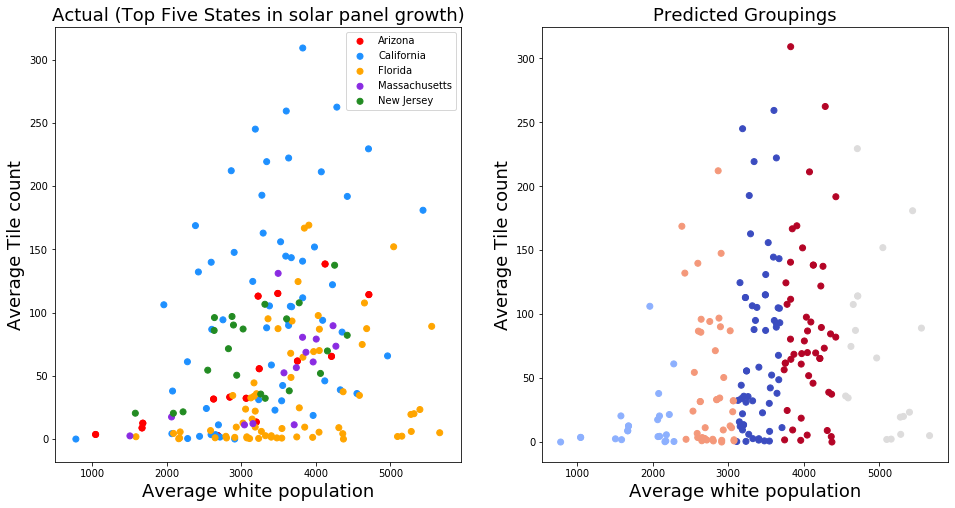

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
for (i, cls) in enumerate(set(actual_labels)):
    x = [p for (j,p) in enumerate(X[:,1]) if actual_labels[j]==cls]
    y = [p for (j,p) in enumerate(X[:,0]) if actual_labels[j]==cls]
    color = [c for (j,c) in enumerate(top_five_states['color']) if actual_labels[j]==cls]
    if (cls == 0):
        label = "Arizona"
    elif (cls == 1):
        label = "California"
    elif (cls == 2):
        label = "Florida"
    elif (cls == 3):
        label = "Massachusetts"
    elif (cls == 4):
        label = "New Jersey"
    axes[0].scatter(x, y, c=color, label=label)
    axes[0].set_title("Actual (Top Five States in solar panel growth)", fontsize=18)
    axes[0].set_xlabel("Average white population", fontsize=18)
    axes[0].set_ylabel("Average Tile count", fontsize=18)
axes[0].legend()
axes[1].scatter(X[:,1], X[:,0], c=new_labels, cmap="coolwarm")
axes[1].set_title("Predicted Groupings", fontsize=18)
axes[1].set_xlabel("Average white population", fontsize=18)
axes[1].set_ylabel("Average Tile count", fontsize=18)

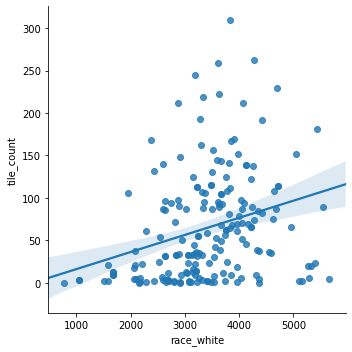

In [123]:
sns.lmplot('race_white', 'tile_count', data=top_five_states)

In [83]:
# first kmeans on Asian population
X = top_five_states[['tile_count','race_asian']]
X = X.to_numpy()
X

array([[1.06155125e+02, 1.21621884e+03],
       [0.00000000e+00, 1.40000000e+01],
       [4.23333333e+01, 5.97777778e+01],
       [8.98235294e+01, 1.88058824e+02],
       [4.60000000e+01, 4.02000000e+01],
       [9.26000000e+01, 8.38000000e+01],
       [2.45014423e+02, 8.03918269e+02],
       [3.50000000e+00, 7.50000000e+01],
       [1.43372093e+02, 1.67418605e+02],
       [2.12115578e+02, 4.69844221e+02],
       [1.51833333e+02, 1.15833333e+02],
       [3.02258065e+01, 1.14935484e+02],
       [2.11258065e+02, 8.91290323e+01],
       [2.41666667e+01, 4.06666667e+01],
       [2.62397351e+02, 2.61920530e+02],
       [3.09148148e+02, 2.07481481e+02],
       [5.85333333e+01, 5.50666667e+01],
       [1.55555556e+00, 5.47777778e+01],
       [6.10963342e+01, 6.04587383e+02],
       [1.80869565e+02, 1.41391304e+02],
       [1.04946429e+02, 2.62160714e+02],
       [3.50000000e+00, 3.85000000e+01],
       [2.28571429e+01, 8.08095238e+01],
       [1.62816327e+02, 4.06204082e+02],
       [4.250000

In [84]:
actual_labels = np.array(top_five_states['state'])

In [85]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [86]:
new_labels = kmeans.labels_
new_labels

array([1, 4, 4, 3, 4, 0, 2, 4, 0, 2, 0, 4, 0, 4, 3, 3, 4, 4, 2, 0, 3, 4,
       4, 3, 4, 4, 3, 3, 4, 1, 3, 4, 3, 2, 0, 3, 2, 1, 2, 3, 1, 3, 1, 3,
       4, 4, 4, 2, 3, 3, 2, 4, 4, 3, 4, 3, 2, 3, 3, 4, 4, 4, 0, 3, 4, 0,
       0, 3, 4, 4, 4, 4, 3, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4,
       4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4,
       4, 4, 4, 0, 3, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 0,
       4, 3, 2, 3, 3, 4, 4, 3, 0, 2, 3, 2, 1, 3, 2, 0, 3, 4, 2, 4, 3, 0,
       0, 4, 0, 4, 0, 4, 4, 3, 2, 4, 2, 0, 3, 3], dtype=int32)

### Example of what a misleading visualization could be

Text(0, 0.5, 'Average Tile count')

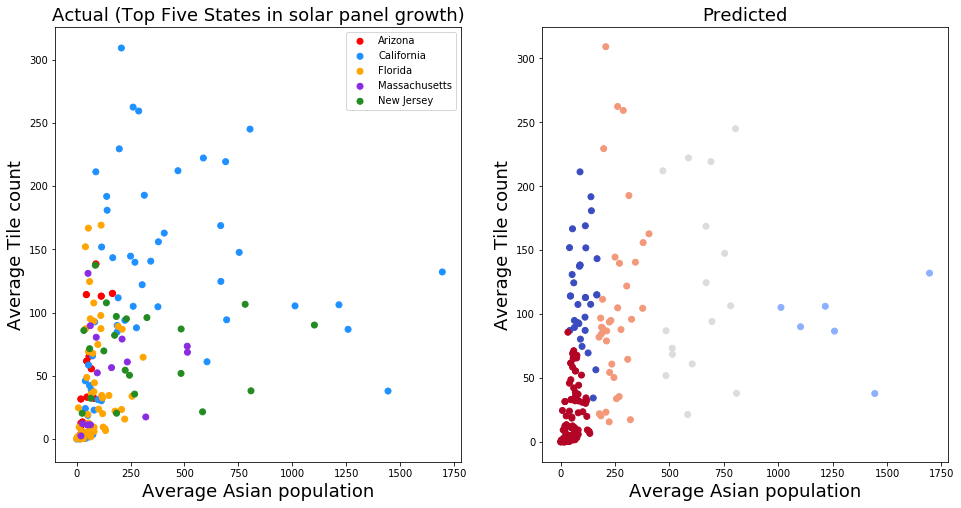

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
for (i, cls) in enumerate(set(actual_labels)):
    x = [p for (j,p) in enumerate(X[:,1]) if actual_labels[j]==cls]
    y = [p for (j,p) in enumerate(X[:,0]) if actual_labels[j]==cls]
    color = [c for (j,c) in enumerate(top_five_states['color']) if actual_labels[j]==cls]
    if (cls == 0):
        label = "Arizona"
    elif (cls == 1):
        label = "California"
    elif (cls == 2):
        label = "Florida"
    elif (cls == 3):
        label = "Massachusetts"
    elif (cls == 4):
        label = "New Jersey"
    axes[0].scatter(x, y, c=color, label=label)
    axes[0].set_title("Actual (Top Five States in solar panel growth)", fontsize=18)
    axes[0].set_xlabel("Average Asian population", fontsize=18)
    axes[0].set_ylabel("Average Tile count", fontsize=18)
axes[0].legend()
axes[1].scatter(X[:,1], X[:,0], c=new_labels, cmap="coolwarm")
axes[1].set_title("Predicted", fontsize=18)
axes[1].set_xlabel("Average Asian population", fontsize=18)
axes[1].set_ylabel("Average Tile count", fontsize=18)